In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 1️⃣ Cargar el dataset
# Asegúrate de subir 'dataset_picor.csv' antes de ejecutar esto

df = pd.read_csv('dataset_picor.csv')

# 2️⃣ Exploración básica del dataset
print("\n📌 Información del dataset:")
df.info()


KeyboardInterrupt: 


📊 Estadísticas descriptivas:
        patient_id          day           q1           q2           q3  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean     50.500000    45.500000     4.782111     4.391444     2.318556   
std      28.867674    25.980602     2.907083     4.186665     1.775977   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%      25.750000    23.000000     2.000000     2.000000     1.000000   
50%      50.500000    45.500000     5.000000     3.000000     2.000000   
75%      75.250000    68.000000     7.000000     5.000000     4.000000   
max     100.000000    90.000000    10.000000    16.000000     5.000000   

                q4           q5           q6           w1           w2  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean      2.318778     2.317556     1.390000    60.251889    36.957444   
std       1.777438     1.765457     1.462237    52.820484    13.255374   
min    

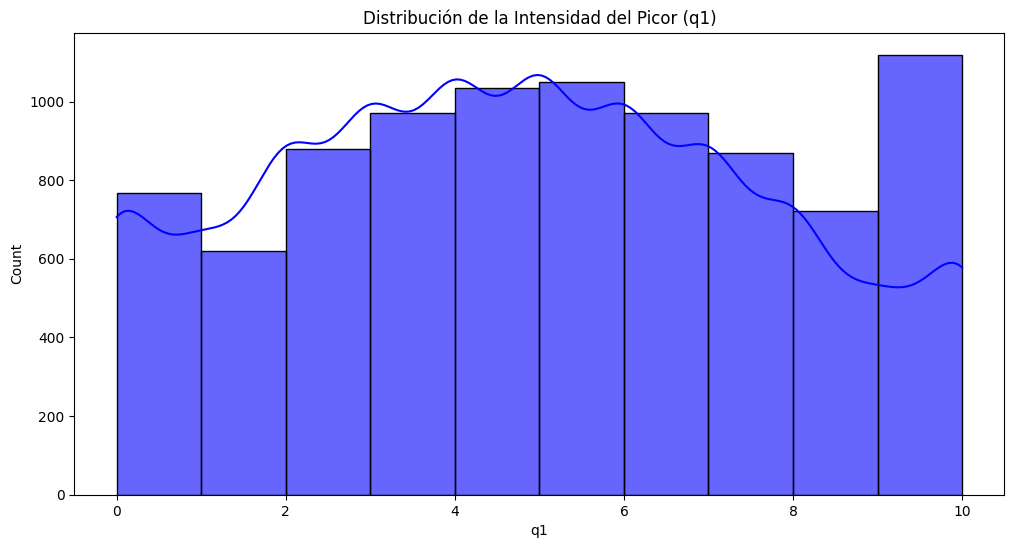

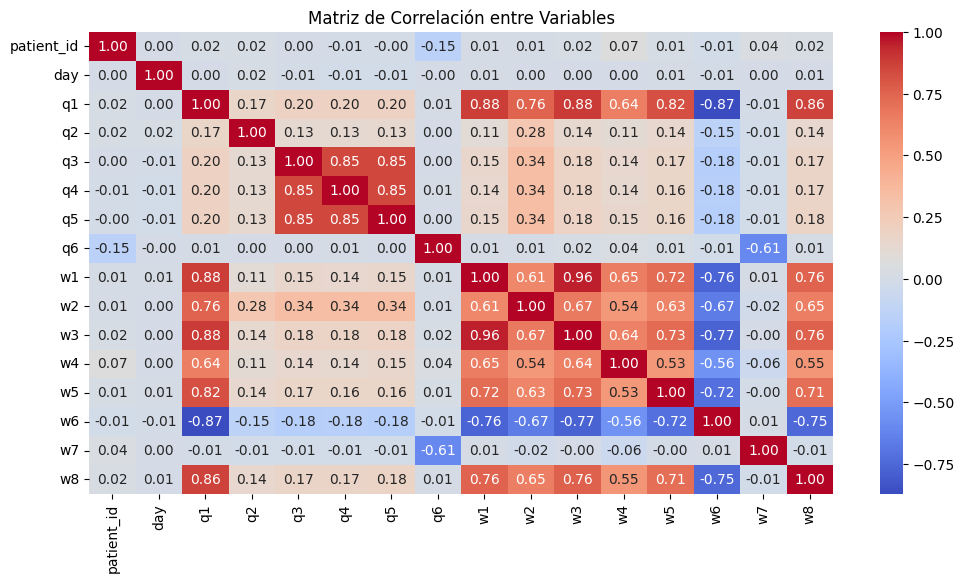

In [ ]:
print("\n📊 Estadísticas descriptivas:")
print(df.describe())

# 3️⃣ Visualización de la distribución de variables importantes
plt.figure(figsize=(12, 6))
sns.histplot(df['q1'], bins=10, kde=True, color='blue', alpha=0.6)
plt.title("Distribución de la Intensidad del Picor (q1)")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación entre Variables")
plt.show()




In [ ]:
 #4️⃣ Preprocesamiento: Normalización de datos
features = ['q1', 'q2', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])



In [ ]:
# 5️⃣ Aplicación de Modelos de Clustering
# K-Means Clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

df['Cluster_KMeans'] = kmeans_labels

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
df['Cluster_DBSCAN'] = dbscan_labels

# Clustering Jerárquico
hierarchical = AgglomerativeClustering(n_clusters=10)
hierarchical_labels = hierarchical.fit_predict(df_scaled)
df['Cluster_Hierarchical'] = hierarchical_labels


In [ ]:


# 6️⃣ Evaluación de Modelos
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
silhouette_hierarchical = silhouette_score(df_scaled, hierarchical_labels)

dbi_kmeans = davies_bouldin_score(df_scaled, kmeans_labels)
dbi_dbscan = davies_bouldin_score(df_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
dbi_hierarchical = davies_bouldin_score(df_scaled, hierarchical_labels)

print(f"\n📊 Evaluación de Clustering:")
print(f"- K-Means: Silhouette = {silhouette_kmeans:.3f}, DBI = {dbi_kmeans:.3f}")
print(f"- DBSCAN: Silhouette = {silhouette_dbscan:.3f}, DBI = {dbi_dbscan:.3f}")
print(f"- Jerárquico: Silhouette = {silhouette_hierarchical:.3f}, DBI = {dbi_hierarchical:.3f}")




📊 Evaluación de Clustering:
- K-Means: Silhouette = 0.188, DBI = 1.446
- DBSCAN: Silhouette = 0.195, DBI = 1.365
- Jerárquico: Silhouette = 0.152, DBI = 1.556


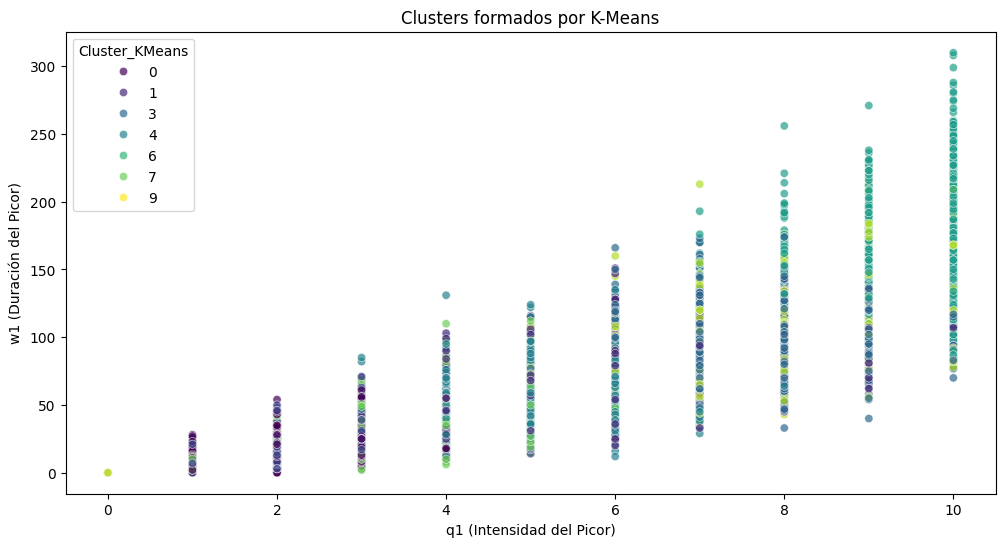

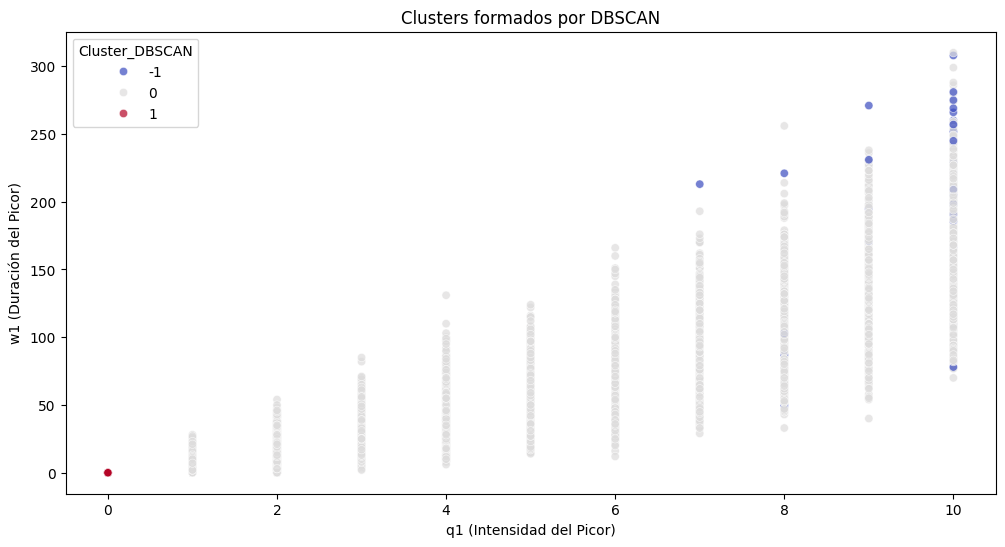

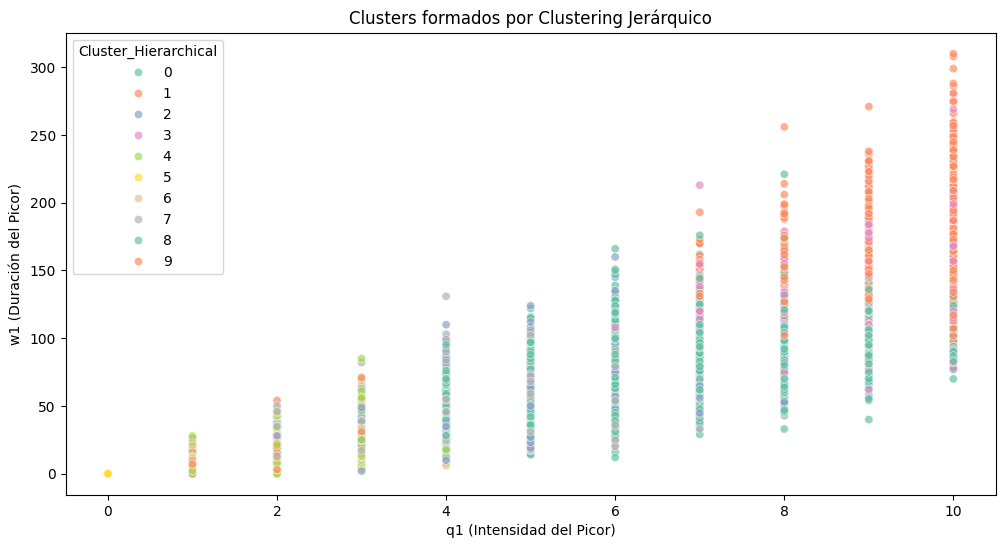


✅ Análisis finalizado. Revisa las gráficas y métricas para interpretar los resultados.


In [ ]:
# 7️⃣ Visualización de los clusters obtenidos
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['q1'], y=df['w1'], hue=df['Cluster_KMeans'], palette='viridis', alpha=0.7)
plt.title("Clusters formados por K-Means")
plt.xlabel("q1 (Intensidad del Picor)")
plt.ylabel("w1 (Duración del Picor)")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['q1'], y=df['w1'], hue=df['Cluster_DBSCAN'], palette='coolwarm', alpha=0.7)
plt.title("Clusters formados por DBSCAN")
plt.xlabel("q1 (Intensidad del Picor)")
plt.ylabel("w1 (Duración del Picor)")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['q1'], y=df['w1'], hue=df['Cluster_Hierarchical'], palette='Set2', alpha=0.7)
plt.title("Clusters formados por Clustering Jerárquico")
plt.xlabel("q1 (Intensidad del Picor)")
plt.ylabel("w1 (Duración del Picor)")
plt.show()

print("\n✅ Análisis finalizado. Revisa las gráficas y métricas para interpretar los resultados.")

Perfil de clusters (10 grupos):


,cluster_10,q1,q2,w1,w2,w3,w4,w5,w6,w7,w8
0,0,2.197395,3.150788,17.851268,34.091158,4.218643,76.272790,24.030158,43.788211,15.557916,1.047978
1,1,6.167702,3.406211,74.417391,42.263354,12.079503,79.705590,28.238509,31.490683,34.560248,4.023602
2,2,2.563314,3.725444,21.259172,34.988166,4.879290,74.514793,24.382249,42.804734,32.811834,1.375148
3,3,7.551464,2.856067,98.000837,45.280335,14.558159,83.137238,29.682008,26.979079,16.332218,5.307113
4,4,4.933649,3.030213,52.097749,39.698460,9.518365,78.764218,27.014810,35.119668,16.219194,2.991114
5,5,9.380383,3.466507,169.370813,48.943780,21.375598,88.595694,31.576555,21.380383,22.448565,5.514354
6,6,0.017730,0.028369,0.085106,0.368794,0.021277,69.769504,21.879433,50.390071,32.794326,0.010638
7,7,3.691489,12.660757,35.300236,37.380615,7.004728,76.984634,25.685579,39.007092,19.343972,2.138298
8,8,7.932971,12.480072,111.972826,46.204710,15.809783,84.327899,30.077899,25.938406,19.771739,5.197464
9,9,0.002033,0.004065,0.018293,0.040650,0.006098,72.162602,21.939024,50.268293,15.756098,0.000000


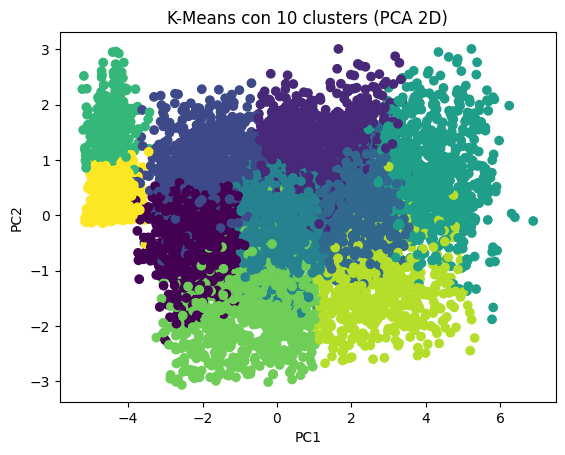

In [ ]:
#2) Selección de features y escalado
features = ['q1', 'q2', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(X_scaled, columns=features, index=df.index)

# 3) K-Means con 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
labels_10 = kmeans.fit_predict(X_scaled)
df['cluster_10'] = labels_10

# 4) Perfil de cada cluster
profile = df.groupby('cluster_10')[features].mean().reset_index()

# Mostrar perfil en tabla interactiva
from IPython.display import display
from sklearn.decomposition import PCA

print("Perfil de clusters (10 grupos):")
display(profile)

# 5) PCA para visualizar en 2D
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_scaled)
df['PC1'] = pcs[:, 0]
df['PC2'] = pcs[:, 1]

# 6) Scatterplot de los dos primeros componentes principales
plt.figure()
plt.scatter(df['PC1'], df['PC2'], c=df['cluster_10'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means con 10 clusters (PCA 2D)')
plt.show()


In [ ]:
# Supongamos que ya tienes:
# - df: tu DataFrame original
# - features: la lista ['q1','q2',...,'w8']
# - scaler: el StandardScaler ya ajustado
# - kmeans: el KMeans(n_clusters=10) ya ajustado

def get_patient_cluster(row_id):
    """
    Dado el índice (o label) de fila `row_id` en df,
    devuelve el número de cluster asignado por kmeans.
    """
    # 1) Extrae el vector de features
    x = df.loc[row_id, features].values.reshape(1, -1)
    # 2) Escálalo
    x_scaled = scaler.transform(x)
    # 3) Predict
    cluster = kmeans.predict(x_scaled)[0]
    return cluster

# Ejemplo de uso:
paciente = 123  # índice o label de fila
print(f"El paciente {paciente} está en el cluster:", get_patient_cluster(paciente))


El paciente 123 está en el cluster: 7


C:\Users\souka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- 1) Datos, features y escalado ---
features = ['q1','q2','w1','w2','w3','w4','w5','w6','w7','w8']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# --- 2) Entrenar K-Means con 10 clusters ---
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['cluster_10'] = labels

# --- 3) Calcular centroides y severidad ---
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
# Definimos severidad = media de q1 y q2 del centroide
centroids['severity_index'] = centroids[['q1','q2']].mean(axis=1)

# --- 4) Ordenar clusters por severidad y mapear a 1-10 ---
centroids = centroids.sort_values('severity_index').reset_index(drop=True)
# Creamos diccionario: índice de fila (0 a 9) → escala 1 a 10
cluster_to_scale = { orig_cluster: scale+1
                     for scale, orig_cluster in enumerate( centroids.index ) }
# Pero cuidado: centroids.index son 0…9 tras reset; 
# si quieres el cluster original, usa centroids.index antes de reset o guarda el índice:
centroids['orig_cluster'] = kmeans.predict(centroids[features])
cluster_to_scale = {
    row.orig_cluster: i+1
    for i, row in centroids.sort_values('severity_index').reset_index(drop=True).iterrows()
}

# --- 5) Función para consultar un paciente ---
def itch_scale_for_patient(row_id):
    """Devuelve la escala 1-10 de picor para el paciente en índice row_id."""
    x = df.loc[row_id, features].values.reshape(1, -1)
    x_scaled = scaler.transform(x)
    cluster = kmeans.predict(x_scaled)[0]
    return cluster_to_scale[cluster]

# --- Ejemplo ---
fila = 123
print("Paciente", fila, "→ cluster", df.loc[fila,'cluster_10'],
      "→ picor nivel", itch_scale_for_patient(fila))


Paciente 123 → cluster 7 → picor nivel 9


C:\Users\souka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
C:\Users\souka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# 1) Selección de features y escalado
features = ['q1','q2','w1','w2','w3','w4','w5','w6','w7','w8']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# 2) Clustering jerárquico con 10 clusters
hier = AgglomerativeClustering(n_clusters=10)
labels_hier = hier.fit_predict(X_scaled)
df['cluster_10_hier'] = labels_hier

# 3) Calcular “centroides” (media de cada feature) en el espacio escalado
centroids_hier = (
    pd.DataFrame(X_scaled, columns=features)
      .assign(cluster=labels_hier)
      .groupby('cluster')
      .mean()
)

# 4) Definir un índice de severidad = media(q1,q2) para cada cluster
centroids_hier['severity_index'] = centroids_hier[['q1','q2']].mean(axis=1)

# 5) Mapear cada etiqueta de cluster (0–9) a tu escala 1–10
#    Ordenamos por severity_index y asignamos 1 al más bajo, 10 al más alto.
ordered = centroids_hier.sort_values('severity_index').index.tolist()
cluster_to_scale_hier = { cluster:i+1 for i, cluster in enumerate(ordered) }

# 6) Función para obtener nivel de picor de un paciente
def get_itch_level_hier(patient_idx):
    cl = df.loc[patient_idx, 'cluster_10_hier']
    return cluster_to_scale_hier[cl]

# — Ejemplo de uso —
fila = 123
print(f"Paciente {fila} → cluster jerárquico {df.loc[fila,'cluster_10_hier']}",
      f"→ picor nivel {get_itch_level_hier(fila)}")

Paciente 123 → cluster jerárquico 2 → picor nivel 9


In [ ]:
from sklearn.metrics import pairwise_distances_argmin



# Selección de features y escalado
features = ['q1', 'q2', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8']
X_scaled = StandardScaler().fit_transform(df[features])

# Ajuste de DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_scaled)

# Centroides de clusters válidos
valid_clusters = sorted(set(labels) - {-1})
centroids = (
    pd.DataFrame(X_scaled, columns=features)
      .assign(cluster=labels)
      .query("cluster != -1")
      .groupby('cluster')
      .mean()
)

# Reasignar ruido al centroide más cercano
noise_indices = np.where(labels == -1)[0]
closest = pairwise_distances_argmin(X_scaled[noise_indices], centroids.values)
for idx, pt in enumerate(noise_indices):
    labels[pt] = valid_clusters[closest[idx]]

# Etiqueta final sin ruido
df['cluster_db_fixed'] = labels

# Mostrar el cluster del paciente 123
cluster_56 = df.loc[56, 'cluster_db_fixed']
print(f"Paciente 56 → cluster DBSCAN reasignado: {cluster_56}")


Paciente 56 → cluster DBSCAN reasignado: 1


In [ ]:
# 1) Selección de features y escalado
features = ['q1','q2','w1','w2','w3','w4','w5','w6','w7','w8']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# 2) Ajustar DBSCAN (tunea eps/min_samples hasta aproximarte a ~10 clusters si realmente quieres 10)
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_scaled)
df['cluster_db'] = labels

# 3) Reasignar ruido (-1) al cluster válido más cercano
valid = sorted(set(labels) - {-1})
centroids = (
    pd.DataFrame(X_scaled, columns=features)
      .assign(cluster=labels)
      .query("cluster != -1")
      .groupby('cluster')
      .mean()
      .loc[valid]
)
noise_idx = np.where(labels == -1)[0]
# Para cada punto de ruido, encuentra el centroide más cercano
closest = pairwise_distances_argmin(X_scaled[noise_idx], centroids.values)
for i, pt in enumerate(noise_idx):
    labels[pt] = valid[closest[i]]
df['cluster_db_fixed'] = labels

# 4) Calcular “severity_index” de cada cluster
#    (media de las intensidades q1 y q2 en el centroide)
centroids_fixed = (
    pd.DataFrame(X_scaled, columns=features)
      .assign(cluster=labels)
      .groupby('cluster')
      .mean()
)
centroids_fixed['severity_index'] = centroids_fixed[['q1','q2']].mean(axis=1)

# 5) Mapear etiquetas a escala 1–N
ordered = centroids_fixed.sort_values('severity_index').index.tolist()
cluster_to_scale_db = { cl:i+1 for i, cl in enumerate(ordered) }
# Si quieres exactamente 1–10, tendrás que ajustar eps/min_samples hasta que len(ordered)==10.

# 6) Función para obtener nivel de picor de un paciente
def itch_level_dbscan(idx):
    cl = df.loc[idx, 'cluster_db_fixed']
    return cluster_to_scale_db[cl]

# — Ejemplo para el paciente 123 —
nivel_123 = itch_level_dbscan(123)
print(f"Paciente 123 → cluster DBSCAN reasignado {df.loc[123,'cluster_db_fixed']} ",
      f"→ picor nivel {nivel_123}")

Paciente 123 → cluster DBSCAN reasignado 1  → picor nivel 3


Paciente 123 → cluster GMM 7  → picor nivel 8


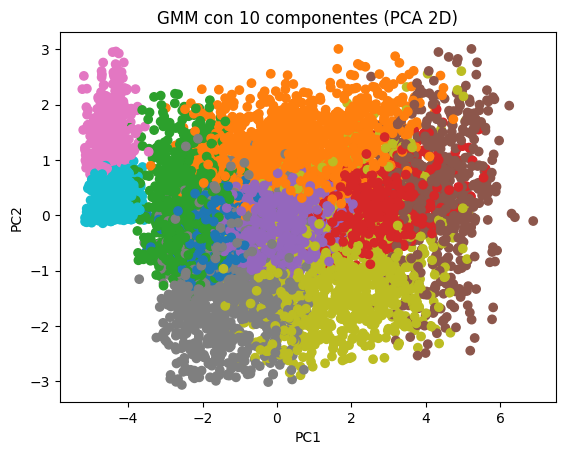

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# 1) Definimos features
features = ['q1','q2','w1','w2','w3','w4','w5','w6','w7','w8']

# 2) Creamos el pipeline con GMM (n_components = nº clusters)
pipeline_gmm = Pipeline([
    ('scaler', StandardScaler()),
    ('gmm', GaussianMixture(n_components=10, covariance_type='full', random_state=42))
])

# 3) Ajustamos el GMM (solo .fit, luego usaremos .predict)
pipeline_gmm.fit(df[features])

# 4) Etiquetas de cluster (0–9)
labels_gmm = pipeline_gmm.named_steps['gmm'].predict(
    pipeline_gmm.named_steps['scaler'].transform(df[features])
)
df['cluster_gmm'] = labels_gmm

# 5) Calculamos centroides “efectivos” en el espacio escalado
X_scaled = pipeline_gmm.named_steps['scaler'].transform(df[features])
centroids_gmm = (
    pd.DataFrame(X_scaled, columns=features)
      .assign(cluster=labels_gmm)
      .groupby('cluster')
      .mean()
)

# 6) Definimos severity_index = media(q1,q2)
centroids_gmm['severity_index'] = centroids_gmm[['q1','q2']].mean(axis=1)

# 7) Mapeo a escala 1–10 ordenado por severity_index
ordered = centroids_gmm.sort_values('severity_index').index.tolist()
cluster_to_scale_gmm = { cl:i+1 for i, cl in enumerate(ordered) }

# 8) Función de consulta
def itch_level_gmm(idx):
    cl = df.loc[idx, 'cluster_gmm']
    return cluster_to_scale_gmm[cl]

# 9) Ejemplo
pac = 123
print(f"Paciente {pac} → cluster GMM {df.loc[pac,'cluster_gmm']} ",
      f"→ picor nivel {itch_level_gmm(pac)}")

# 10) Visualizar con PCA 2D
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_scaled)
df['PC1'], df['PC2'] = pcs[:,0], pcs[:,1]
plt.figure()
plt.scatter(df['PC1'], df['PC2'], c=df['cluster_gmm'], cmap='tab10')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('GMM con 10 componentes (PCA 2D)')
plt.show()


Paciente 123 → cluster Spectral 3 ”→ picor nivel 8


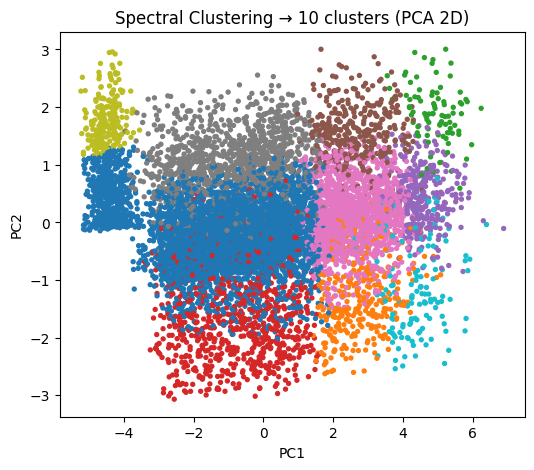

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- 1) Carga tu DataFrame ---
# df = pd.read_csv('ruta/a/dataset_picor.csv')

# --- 2) Selección de features y escalado ---
features = ['q1','q2','w1','w2','w3','w4','w5','w6','w7','w8']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# --- 3) Spectral Clustering con 10 grupos ---
spec = SpectralClustering(
    n_clusters=10,
    affinity='rbf',           # kernel gaussiano; puedes probar 'nearest_neighbors'
    assign_labels='kmeans',   # refinamiento final con KMeans interno
    random_state=42
)
labels_spec = spec.fit_predict(X_scaled)
df['cluster_spec'] = labels_spec

# --- 4) Calcular centroides en el espacio escalado ---
centroids_spec = (
    pd.DataFrame(X_scaled, columns=features)
      .assign(cluster=labels_spec)
      .groupby('cluster')
      .mean()
)

# --- 5) Definir severity_index = media(q1,q2) de cada centroide ---
centroids_spec['severity_index'] = centroids_spec[['q1','q2']].mean(axis=1)

# --- 6) Mapear etiquetas 0–9 a escala 1–10 ordenada por severity_index ---
ordered = centroids_spec.sort_values('severity_index').index.tolist()
cluster_to_scale_spec = { cl: i+1 for i, cl in enumerate(ordered) }

# --- 7) Función para obtener nivel de picor de un paciente ---
def itch_level_spec(idx):
    cl = df.loc[idx, 'cluster_spec']
    return cluster_to_scale_spec[cl]

# --- 8) Ejemplo para el paciente 123 ---
nivel_123 = itch_level_spec(123)
print(f"Paciente 123 → cluster Spectral {df.loc[123,'cluster_spec']} ”→ picor nivel {nivel_123}")

# --- 9) Visualización en 2D con PCA ---
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_scaled)
df['PC1'], df['PC2'] = pcs[:,0], pcs[:,1]
plt.figure(figsize=(6,5))
plt.scatter(df.PC1, df.PC2, c=df.cluster_spec, cmap='tab10', s=8)
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('Spectral Clustering → 10 clusters (PCA 2D)')
plt.show()


Paciente 123 → cluster BIRCH 3 → picor nivel 7


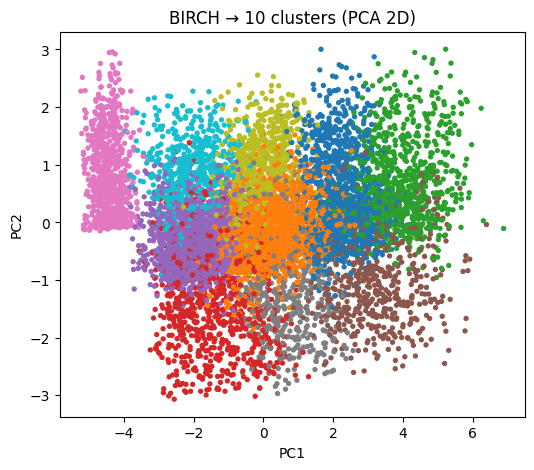

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- 1) Carga tu DataFrame ---
# df = pd.read_csv('ruta/a/dataset_picor.csv')

# --- 2) Selección de features y escalado ---
features = ['q1','q2','w1','w2','w3','w4','w5','w6','w7','w8']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# --- 3) BIRCH con n_clusters=10 ---
birch = Birch(n_clusters=10, threshold=0.5)  # threshold controla sensibilidad
labels_birch = birch.fit_predict(X_scaled)
df['cluster_birch'] = labels_birch

# --- 4) Calcular “centroides” de cada cluster en el espacio escalado ---
centroids_birch = (
    pd.DataFrame(X_scaled, columns=features)
      .assign(cluster=labels_birch)
      .groupby('cluster')
      .mean()
)

# --- 5) Definir severity_index = media(q1,q2) de cada centroide ---
centroids_birch['severity_index'] = centroids_birch[['q1','q2']].mean(axis=1)

# --- 6) Mapear etiquetas 0–9 a escala 1–10 según severity_index ---
ordered = centroids_birch.sort_values('severity_index').index.tolist()
cluster_to_scale_birch = { cl: i+1 for i, cl in enumerate(ordered) }

# --- 7) Función para obtener nivel de picor de un paciente ---
def itch_level_birch(idx):
    cl = df.loc[idx, 'cluster_birch']
    return cluster_to_scale_birch[cl]

# --- 8) Ejemplo para el paciente 123 ---
nivel_123 = itch_level_birch(123)
print(f"Paciente 123 → cluster BIRCH {df.loc[123,'cluster_birch']} "
      f"→ picor nivel {nivel_123}")

# --- 9) Visualización en 2D con PCA ---
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_scaled)
df['PC1'], df['PC2'] = pcs[:,0], pcs[:,1]

plt.figure(figsize=(6,5))
plt.scatter(df['PC1'], df['PC2'], c=df['cluster_birch'], cmap='tab10', s=8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('BIRCH → 10 clusters (PCA 2D)')
plt.show()


Paciente 123 → cluster MiniBatchKMeans 5 → picor nivel 9


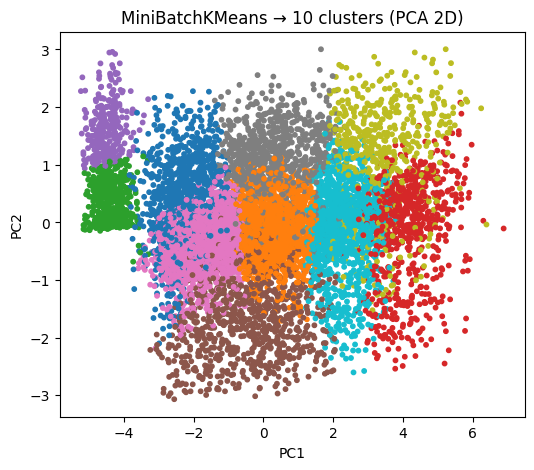

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1) Cargar datos
# df = pd.read_csv('ruta/a/dataset_picor.csv')

# 2) Selección de features y escalado
features = ['q1','q2','w1','w2','w3','w4','w5','w6','w7','w8']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# 3) MiniBatchKMeans con 10 clusters
mbk = MiniBatchKMeans(
    n_clusters=10,
    random_state=42,
    batch_size=500    # tamaño de mini-lote; ajusta según tu RAM
)
labels_mbk = mbk.fit_predict(X_scaled)
df['cluster_mbk'] = labels_mbk

# 4) Calcular centroides en el espacio escalado
centroids = (
    pd.DataFrame(X_scaled, columns=features)
      .assign(cluster=labels_mbk)
      .groupby('cluster')
      .mean()
)

# 5) Definir severity_index = media(q1,q2)
centroids['severity_index'] = centroids[['q1','q2']].mean(axis=1)

# 6) Ordenar clusters por severidad y mapear a escala 1–10
ordered = centroids.sort_values('severity_index').index.tolist()
cluster_to_scale_mbk = { cl: i+1 for i, cl in enumerate(ordered) }

# 7) Función para consultar nivel de picor de un paciente
def itch_level_mbk(idx):
    cl = df.loc[idx, 'cluster_mbk']
    return cluster_to_scale_mbk[cl]

# 8) Ejemplo para el paciente 123
nivel_123 = itch_level_mbk(123)
print(f"Paciente 123 → cluster MiniBatchKMeans {df.loc[123,'cluster_mbk']} "
      f"→ picor nivel {nivel_123}")

# 9) Visualización en 2D con PCA
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_scaled)
df['PC1'], df['PC2'] = pcs[:,0], pcs[:,1]

plt.figure(figsize=(6,5))
plt.scatter(df['PC1'], df['PC2'], c=df['cluster_mbk'], cmap='tab10', s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('MiniBatchKMeans → 10 clusters (PCA 2D)')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift, estimate_bandwidth

# 1) Carga tu DataFrame
# df = pd.read_csv('ruta/a/dataset_picor.csv')

# 2) Selección de features y escalado
features = ['q1','q2','w1','w2','w3','w4','w5','w6','w7','w8']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# 3) Barrido fino de quantile para encontrar exactamente 10 clusters
best_labels = None
best_q = None
for q in np.linspace(0.01, 0.99, 99):  # Expandimos el rango de quantiles
    bw = estimate_bandwidth(X_scaled, quantile=q)
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    labels = ms.fit_predict(X_scaled)
    n_clusters = len(np.unique(labels))
    if n_clusters == 10:
        best_labels = labels
        best_q = q
        print(f"→ Encontrado quantile={q:.2f} → bandwidth={bw:.3f} → 10 clusters")
        break

if best_labels is None:
    # Fallback: Usar el quantile que más se acerque a 10 clusters
    closest_q = None
    closest_diff = float('inf')
    for q in np.linspace(0.01, 0.99, 99):
        bw = estimate_bandwidth(X_scaled, quantile=q)
        ms = MeanShift(bandwidth=bw, bin_seeding=True)
        labels = ms.fit_predict(X_scaled)
        n_clusters = len(np.unique(labels))
        diff = abs(n_clusters - 10)
        if diff < closest_diff:
            closest_diff = diff
            closest_q = q
            best_labels = labels
    print(f"⚠️ No se encontró exactamente 10 clusters. Usando quantile={closest_q:.2f} con {len(np.unique(best_labels))} clusters.")

df['cluster_ms10'] = best_labels

# 4) Calcular centroides y severity_index
centroids = (
    pd.DataFrame(X_scaled, columns=features)
      .assign(cluster=best_labels)
      .groupby('cluster')
      .mean()
)
centroids['severity_index'] = centroids[['q1','q2']].mean(axis=1)

# 5) Mapear a escala 1–10
ordered = centroids.sort_values('severity_index').index.tolist()
cluster_to_scale_ms10 = { cl:i+1 for i, cl in enumerate(ordered) }

# 6) Función de consulta
def itch_level_ms10(idx):
    cl = df.loc[idx, 'cluster_ms10']
    return cluster_to_scale_ms10[cl]

# 7) Ejemplo para el paciente 123
nivel_123 = itch_level_ms10(123)
print(f"Paciente 123 → cluster MeanShift10 {df.loc[123,'cluster_ms10']} "
      f"→ picor nivel {nivel_123}")


⚠️ No se encontró exactamente 10 clusters. Usando quantile=0.02 con 15 clusters.
Paciente 123 → cluster MeanShift10 0 → picor nivel 2
